# WELCOME

In [ ]:
## welcome to my stress detection project.

# Import Libraries

Let's import some libraries to get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import seaborn as sns

from wordcloud import STOPWORDS
from PIL import Image
from wordcloud import WordCloud

from textblob import TextBlob
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion 
Let's start by reading in the dreaddit csv file into a pandas dataframe

In [2]:
train= pd.read_csv('dreaddit-train.csv')

In [3]:
test= pd.read_csv('dreaddit-test.csv')

In [4]:
df= train.append(test)

In [5]:
df.shape

(3553, 116)

In [6]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [8]:
df.columns


Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [9]:
df.subreddit.value_counts()

ptsd                711
relationships       694
anxiety             650
domesticviolence    388
assistance          355
survivorsofabuse    315
homeless            220
almosthomeless       99
stress               78
food_pantry          43
Name: subreddit, dtype: int64

In [10]:
df.duplicated().sum()

0

# EDA

In [11]:
## checking for missing data with the help of EDA

<Axes: >

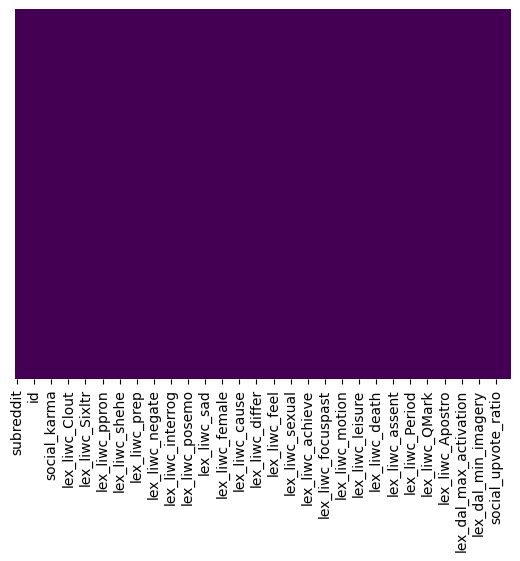

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
## As the data is large so i used y axis instead of x axis for ploting.

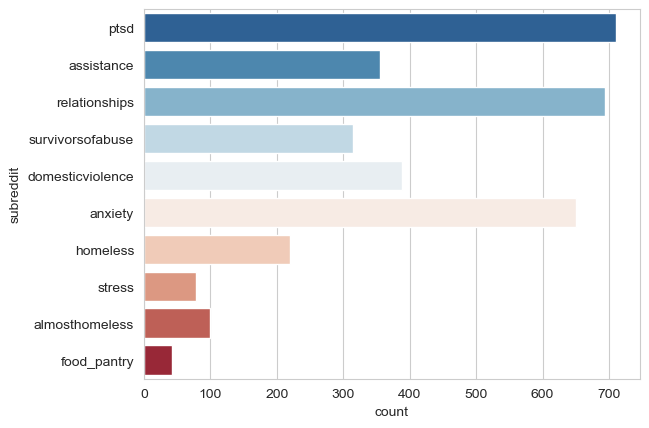

In [14]:
sns.set_style('whitegrid')
sns.countplot(y='subreddit',data=df,palette='RdBu_r')
colors=[]

In [15]:
## Another count plot with hue i.e lable which shows the data in comparison.

<Axes: xlabel='label', ylabel='count'>

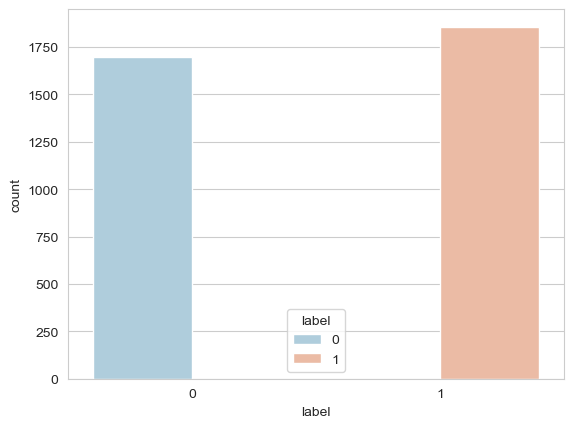

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='label',hue='label',data=df,palette='RdBu_r')

In [18]:
## heatmap shows the relavent data.

<Axes: >

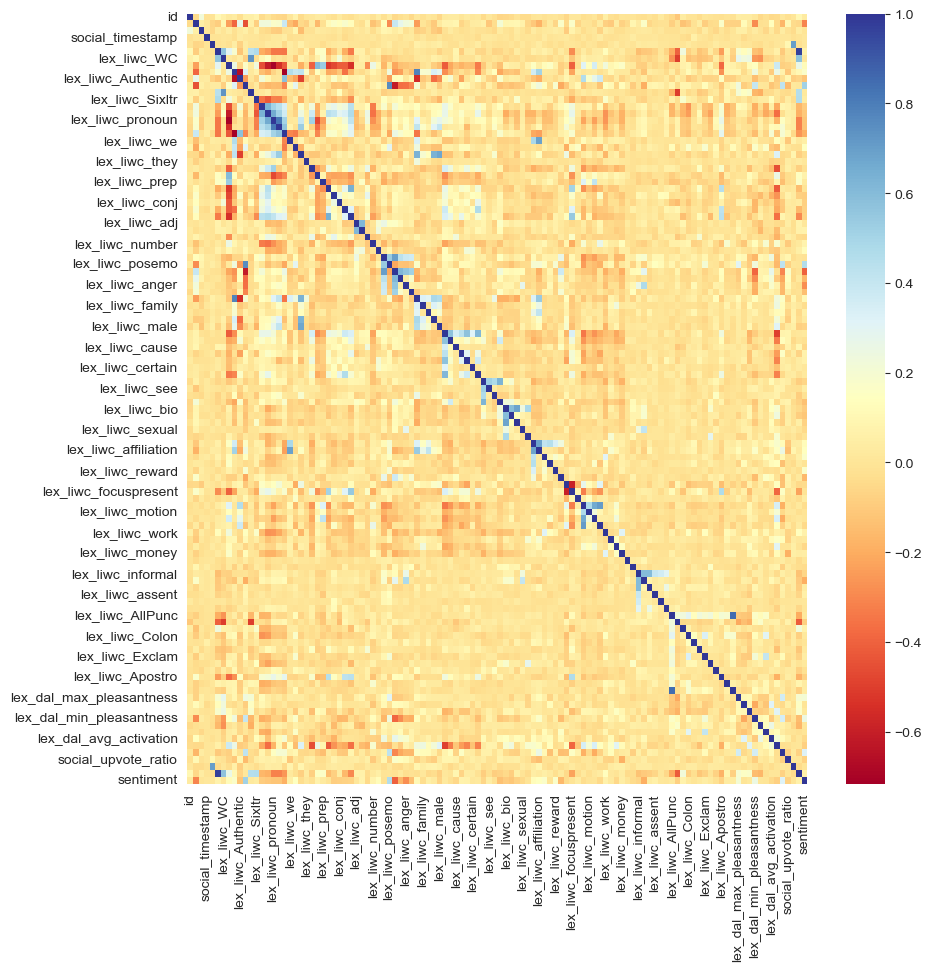

In [19]:
%matplotlib inline
fig, ax = plt.subplots(figsize= (10,10))
sns.heatmap(df.corr(), cmap = "RdYlBu")


# Data Cleaning

In [6]:
## dropping 3 columns which are not seems important

df= df.drop(['post_id', 'sentence_range', 'id'], axis = 1)

In [7]:
df.head()

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,1.521614e+09,5,1.806818,116,72.64,15.04,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,1.527010e+09,4,9.429737,109,79.08,76.85,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.8,1.535936e+09,2,7.769821,167,33.80,76.38,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.6,1.516430e+09,0,2.667798,273,2.98,15.25,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.8,1.539809e+09,24,7.554238,89,32.22,28.71,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [8]:
## HeatMap after dropping some of the column 

<Axes: >

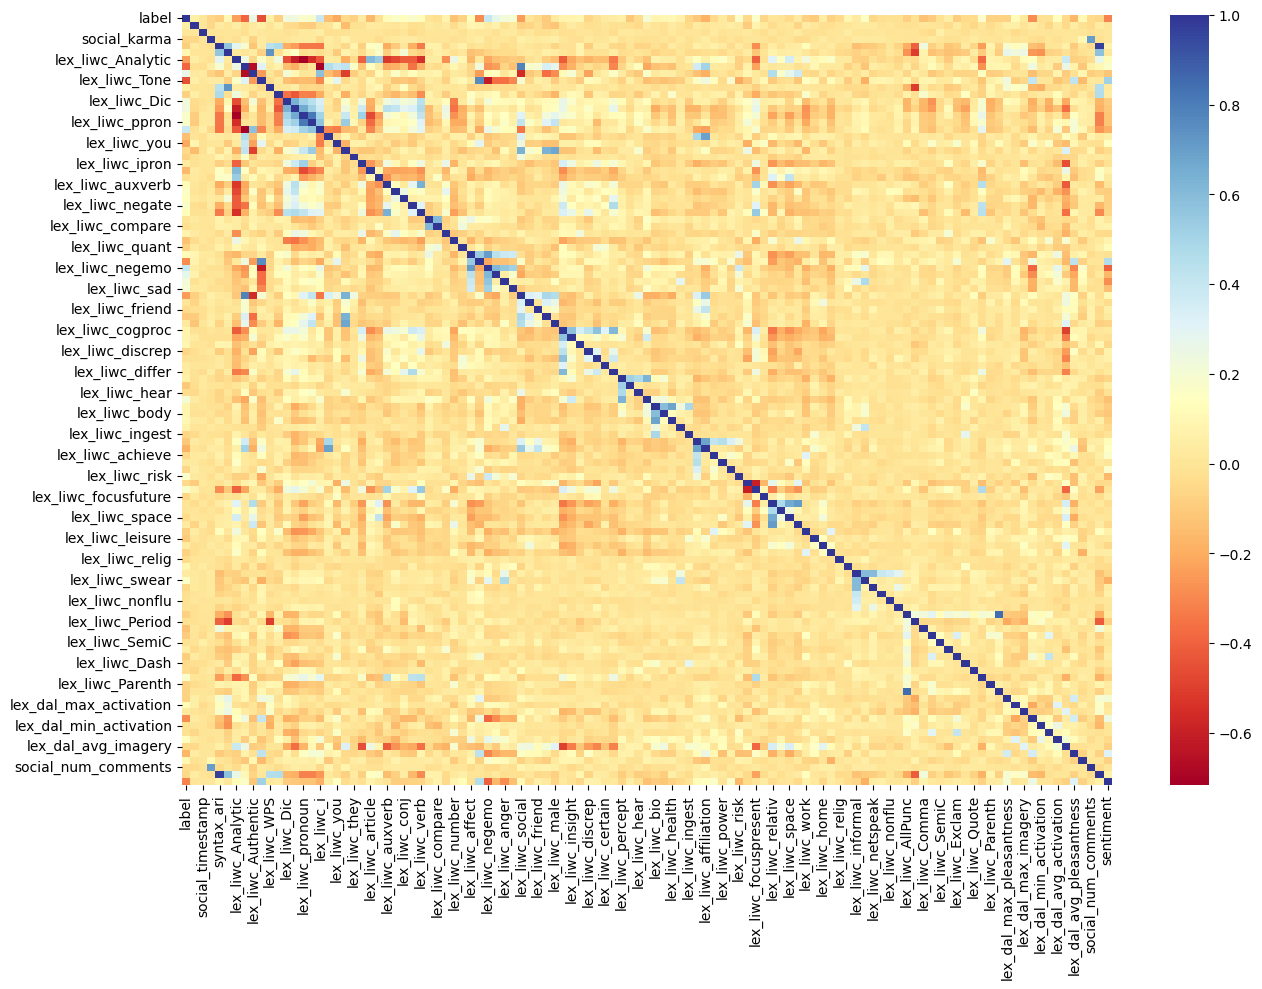

In [9]:
%matplotlib inline
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(df.corr(), cmap = "RdYlBu")

In [10]:
## here we can see social timestamp is not in its correct form.

In [11]:
name_column=df['social_timestamp']
print(name_column)

0      1.521614e+09
1      1.527010e+09
2      1.535936e+09
3      1.516430e+09
4      1.539809e+09
           ...     
710    1.517790e+09
711    1.515192e+09
712    1.516849e+09
713    1.532048e+09
714    1.517605e+09
Name: social_timestamp, Length: 3553, dtype: float64


In [12]:
# Convert 10-digit timestamp to datetime

df['social_timestamp'] = pd.to_datetime(df['social_timestamp'], unit='s')

# Extract relevant features (e.g., year, month, day, hour, minute)

df['year'] = df['social_timestamp'].dt.year
df['month'] = df['social_timestamp'].dt.month
df['day'] = df['social_timestamp'].dt.day
df['hour'] = df['social_timestamp'].dt.hour
df['minute'] = df['social_timestamp'].dt.minute

# Drop the original timestamp column if not needed

df = df.drop(columns=['social_timestamp'])

# Now, 'year', 'month', 'day', 'hour', and 'minute' can be used in your ML model
print(df)

            subreddit                                               text  \
0                ptsd  He said he had not felt that way before, sugge...   
1          assistance  Hey there r/assistance, Not sure if this is th...   
2                ptsd  My mom then hit me with the newspaper and it s...   
3       relationships  until i met my new boyfriend, he is amazing, h...   
4    survivorsofabuse  October is Domestic Violence Awareness Month a...   
..                ...                                                ...   
710              ptsd  i have horrible vivid nightmares every night. ...   
711     relationships  Also I can't think about both of them without ...   
712     relationships  Furthermore, I told him before we got really s...   
713        assistance  Here's the link to my amazon wish list where t...   
714        assistance  How can I keep us protected? They have already...   

     label  confidence  social_karma  syntax_ari  lex_liwc_WC  \
0        1    0.800000

In [13]:
# Merge 'day', 'month', and 'year' into a single 'date' column

df['date'] = pd.to_datetime(df[['year', 'month', 'day']], format='%Y %m %d')

# Drop the original 'day', 'month', and 'year' columns if needed

df = df.drop(columns=['day', 'month', 'year'])

print(df)

            subreddit                                               text  \
0                ptsd  He said he had not felt that way before, sugge...   
1          assistance  Hey there r/assistance, Not sure if this is th...   
2                ptsd  My mom then hit me with the newspaper and it s...   
3       relationships  until i met my new boyfriend, he is amazing, h...   
4    survivorsofabuse  October is Domestic Violence Awareness Month a...   
..                ...                                                ...   
710              ptsd  i have horrible vivid nightmares every night. ...   
711     relationships  Also I can't think about both of them without ...   
712     relationships  Furthermore, I told him before we got really s...   
713        assistance  Here's the link to my amazon wish list where t...   
714        assistance  How can I keep us protected? They have already...   

     label  confidence  social_karma  syntax_ari  lex_liwc_WC  \
0        1    0.800000

In [28]:
## This shows the the convertated timestamp into different columns

In [14]:
df.tail()

,subreddit,text,label,confidence,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,hour,minute,date
710,ptsd,i have horrible vivid nightmares every night. ...,1,1.000000,7,4.597368,53,24.44,22.52,93.70,...,1.76956,1.46522,1.84112,0.79,15,4.589333,-0.075000,0,22,2018-02-05
711,relationships,Also I can't think about both of them without ...,1,0.571429,0,1.452083,72,68.15,55.52,58.07,...,1.67960,1.51429,1.83530,0.50,7,2.833889,0.189286,22,40,2018-01-05
712,relationships,"Furthermore, I told him before we got really s...",1,0.600000,3,3.956447,71,1.25,28.65,41.55,...,1.71367,1.50909,1.85501,0.72,10,5.709053,-0.044444,2,49,2018-01-25
713,assistance,Here's the link to my amazon wish list where t...,0,0.600000,18,0.236814,60,80.75,25.24,93.30,...,1.65132,1.53913,1.90766,0.74,2,2.365294,0.090000,0,58,2018-07-20
714,assistance,How can I keep us protected? They have already...,1,0.000000,4,3.221250,62,9.68,96.18,49.78,...,1.66648,1.52500,1.90820,0.63,8,3.783250,0.136364,20,49,2018-02-02


In [29]:
Last_two_columns = df.iloc[:, -2:]
print(Last_two_columns)

     minute       date
0        39 2018-03-21
1        23 2018-05-22
2        46 2018-09-03
3        25 2018-01-20
4        43 2018-10-17
..      ...        ...
710      22 2018-02-05
711      40 2018-01-05
712      49 2018-01-25
713      58 2018-07-20
714      49 2018-02-02

[3553 rows x 2 columns]


In [30]:
# Merge 'hour' and 'minute' into a single 'time' column

df['time'] = pd.to_datetime(df[['hour', 'minute']].astype(str).agg(' '.join, axis=1), format='%H %M').dt.time

# Drop the original 'hour' and 'minute' columns if needed
df = df.drop(columns=['hour', 'minute'])

print(df)

            subreddit                                               text  \
0                ptsd  He said he had not felt that way before, sugge...   
1          assistance  Hey there r/assistance, Not sure if this is th...   
2                ptsd  My mom then hit me with the newspaper and it s...   
3       relationships  until i met my new boyfriend, he is amazing, h...   
4    survivorsofabuse  October is Domestic Violence Awareness Month a...   
..                ...                                                ...   
710              ptsd  i have horrible vivid nightmares every night. ...   
711     relationships  Also I can't think about both of them without ...   
712     relationships  Furthermore, I told him before we got really s...   
713        assistance  Here's the link to my amazon wish list where t...   
714        assistance  How can I keep us protected? They have already...   

     label  confidence  social_karma  syntax_ari  lex_liwc_WC  \
0        1    0.800000

In [31]:
Last_two_columns = df.iloc[:, -2:]
print(Last_two_columns)

          date      time
0   2018-03-21  06:39:00
1   2018-05-22  17:23:00
2   2018-09-03  00:46:00
3   2018-01-20  06:25:00
4   2018-10-17  20:43:00
..         ...       ...
710 2018-02-05  00:22:00
711 2018-01-05  22:40:00
712 2018-01-25  02:49:00
713 2018-07-20  00:58:00
714 2018-02-02  20:49:00

[3553 rows x 2 columns]


In [32]:
##converting decimal/float value into integer type of each column

In [33]:
df["syntax_ari"]=df["syntax_ari"].astype("int")

In [34]:
df["confidence"]=df["confidence"].astype("int")

In [35]:
df["lex_liwc_Analytic"]=df["lex_liwc_Analytic"].astype("int")

In [36]:

df.columns

Index(['subreddit', 'text', 'label', 'confidence', 'social_karma',
       'syntax_ari', 'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout',
       'lex_liwc_Authentic',
       ...
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment', 'date', 'time'],
      dtype='object', length=114)

In [37]:
df["lex_liwc_Clout"]=df["lex_liwc_Clout"].astype("int")

In [38]:
df["confidence"]=df["confidence"].astype("int")

In [39]:
df["lex_liwc_Authentic"]=df["lex_liwc_Authentic"].astype("int")

In [40]:
df["lex_dal_min_imagery"]=df["lex_dal_min_imagery"].astype("int")

In [41]:
df["lex_dal_avg_activation"]=df["lex_dal_avg_activation"].astype("int")

In [42]:
df["lex_dal_avg_imagery"]=df["lex_dal_avg_imagery"].astype("int")

In [43]:
df["lex_dal_avg_pleasantness"]=df["lex_dal_avg_pleasantness"].astype("int")

In [44]:
df["social_upvote_ratio"]=df["social_upvote_ratio"].astype("int")

In [45]:
df["syntax_fk_grade"]=df["syntax_fk_grade"].astype("int")

In [46]:
df.head()

,subreddit,text,label,confidence,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,date,time
0,ptsd,"He said he had not felt that way before, sugge...",1,0,5,1,116,72,15,89,...,1,1,1,1,0,1,3,-0.002742,2018-03-21,06:39:00
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1,4,9,109,79,76,56,...,1,1,1,1,0,2,8,0.292857,2018-05-22,17:23:00
2,ptsd,My mom then hit me with the newspaper and it s...,1,0,2,7,167,33,76,86,...,1,1,1,1,0,0,7,0.011894,2018-09-03,00:46:00
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0,0,2,273,2,15,95,...,1,1,1,1,0,5,4,0.141671,2018-01-20,06:25:00
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0,24,7,89,32,28,84,...,1,1,1,1,1,1,7,-0.204167,2018-10-17,20:43:00


In [47]:
df.describe()

,label,confidence,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,...,3553.000000,3553.000000,3553.0,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,0.522657,0.392063,19.543203,4.233605,85.929918,34.650436,39.983957,67.207149,33.216364,18.123392,...,1.086601,1.119619,1.0,1.000281,1.001126,1.021390,0.348438,9.747819,4.966226,0.041667
std,0.499557,0.488279,87.263634,3.240288,32.105144,26.443558,31.463273,32.715930,35.165154,9.066482,...,0.115371,0.086195,0.0,0.016777,0.033539,0.144702,0.476543,20.324300,2.529663,0.195195
min,0.000000,0.000000,0.000000,-6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.400000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,-2.000000,-1.000000
25%,0.000000,0.000000,2.000000,2.000000,65.000000,12.000000,11.000000,43.000000,1.360000,13.400000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,-0.068939
50%,1.000000,0.000000,5.000000,4.000000,81.000000,29.000000,33.000000,81.000000,25.770000,16.800000,...,1.000000,1.142900,1.0,1.000000,1.000000,1.000000,0.000000,5.000000,5.000000,0.043384
75%,1.000000,1.000000,10.000000,6.000000,101.000000,54.000000,68.000000,96.000000,61.210000,21.000000,...,1.142900,1.142900,1.0,1.000000,1.000000,1.000000,1.000000,10.000000,6.000000,0.164286
max,1.000000,1.000000,1687.000000,24.000000,310.000000,99.000000,99.000000,99.000000,99.000000,233.000000,...,1.900000,1.777800,1.0,2.000000,2.000000,2.000000,1.000000,416.000000,21.000000,1.000000


# Data processing

Possible approach of data preprocessing and feature engineering
Data Encoding,
Tokenization, Removal of punctuations.
Removal of commonly used words (stopwords).
Lemmatization or Stemming (Normalization)

In [48]:
## Data Encoding / Lablel encoding. This convert catogarical data into labels/numerical data

In [49]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['subreddit'] = le.fit_transform(df['subreddit'])

In [50]:
## here subreddit was in categorical form after applying encoding it get converted to numerical labels

In [51]:
df.head()

,subreddit,text,label,confidence,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,date,time
0,6,"He said he had not felt that way before, sugge...",1,0,5,1,116,72,15,89,...,1,1,1,1,0,1,3,-0.002742,2018-03-21,06:39:00
1,2,"Hey there r/assistance, Not sure if this is th...",0,1,4,9,109,79,76,56,...,1,1,1,1,0,2,8,0.292857,2018-05-22,17:23:00
2,6,My mom then hit me with the newspaper and it s...,1,0,2,7,167,33,76,86,...,1,1,1,1,0,0,7,0.011894,2018-09-03,00:46:00
3,7,"until i met my new boyfriend, he is amazing, h...",1,0,0,2,273,2,15,95,...,1,1,1,1,0,5,4,0.141671,2018-01-20,06:25:00
4,9,October is Domestic Violence Awareness Month a...,1,0,24,7,89,32,28,84,...,1,1,1,1,1,1,7,-0.204167,2018-10-17,20:43:00



# Determining polarity from words

In [ ]:
## Lets start working with the text/ words

In [ ]:
## here i have installed textblob.   

pip install textblob

In [52]:
##Here sentiments will convert it into polarity

from textblob import TextBlob

print("Positive Sentiment :")
print("Polarity : ",TextBlob("greatest").polarity)
print("Sentiment : ",TextBlob("greatest").sentiment)
print()
#Negative Sentiment
print("Negative Sentiment :")
print("Polarity : ",TextBlob("worst").polarity)
print("Sentiment : ",TextBlob("worst").sentiment)


Positive Sentiment :
Polarity :  1.0
Sentiment :  Sentiment(polarity=1.0, subjectivity=1.0)

Negative Sentiment :
Polarity :  -1.0
Sentiment :  Sentiment(polarity=-1.0, subjectivity=1.0)


In [53]:
#Sentiment Detection

def mood(txt):
    return TextBlob(txt).sentiment.polarity

In [54]:
#Get text
posts = df[["text"]]


In [55]:
#Adding Mood Detection as column

posts["sentiment"] = posts["text"].apply(mood)
posts.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [56]:
print("Value Exploration :")
print("Minimum Sentiment :", posts["sentiment"].min())
print("Maximum Sentiment :", posts["sentiment"].max())
print()
print("Counts :")
print(posts.sentiment.value_counts())

Value Exploration :
Minimum Sentiment : -1.0
Maximum Sentiment : 1.0

Counts :
 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: sentiment, Length: 2627, dtype: int64


# Exploring Words

In [ ]:
## Let's get an idea of the words

In [ ]:
pip install nltk

In [57]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
## using stopwords 
stopwords =set(stopwords.words ('english'))

In [59]:
from nltk.corpus.reader import WordListCorpusReader

In [60]:
import nltk
import string
import re
from nltk.corpus import stopwords

stop_words_list = stopwords.words("english")

## Removing symbols, spaces , continuation of the same line etc  

def removal(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"https?://S+|www.\.\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if not word in stop_words_list]
    words = [re.sub(r"(.)\1{1,}", r"\1\1", word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]
    text = " ".join(words)
    return text
posts["text"] = posts["text"].apply(removal)
posts["text"]

0      said felt way suggeted go rest trigger ahead y...
1      hey rassistance sure right place post goes im ...
2      mom hit newspaper shocked would knows dont lik...
3      met new boyfriend amazing kind sweet good stud...
4      october domestic violence awareness month dome...
                             ...                        
710    horrible vivid nightmares every night sometime...
711    also cant think without getting angry jealous ...
712    furthermore told got really serious anxiety de...
713    heres link amazon wish list two items link doe...
714    keep us protected already told unwelcome perso...
Name: text, Length: 3553, dtype: object

In [61]:
#Adding meaning to text from dataset
posts["meaning"] = df["label"].map({0:"No stress", 1:"Stressed"})
#posts = posts[["text", "meaning"]]
posts.head()

,text,sentiment,meaning
0,said felt way suggeted go rest trigger ahead y...,-0.002742,Stressed
1,hey rassistance sure right place post goes im ...,0.292857,No stress
2,mom hit newspaper shocked would knows dont lik...,0.011894,Stressed
3,met new boyfriend amazing kind sweet good stud...,0.141671,Stressed
4,october domestic violence awareness month dome...,-0.204167,Stressed


In [62]:
## applying SnowballStemmer to the text

In [63]:
pip install SnowballStemmer

Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
nltk.download('punkt')

# Initialize the SnowballStemmer for English
stemmer = SnowballStemmer("english")

# Define a function to perform stemming on a single text
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the 'text' column in the dataset
df['stemmed_text'] = df['text'].apply(stem_text)

# Print the first few rows to see the results
print(df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   subreddit                                               text  label  \
0          6  He said he had not felt that way before, sugge...      1   
1          2  Hey there r/assistance, Not sure if this is th...      0   
2          6  My mom then hit me with the newspaper and it s...      1   
3          7  until i met my new boyfriend, he is amazing, h...      1   
4          9  October is Domestic Violence Awareness Month a...      1   

   confidence  social_karma  syntax_ari  lex_liwc_WC  lex_liwc_Analytic  \
0           0             5           1          116                 72   
1           1             4           9          109                 79   
2           0             2           7          167                 33   
3           0             0           2          273                  2   
4           0            24           7           89                 32   

   lex_liwc_Clout  lex_liwc_Authentic  ...  lex_dal_avg_activation  \
0              15                 

In [ ]:
 ## Applied Lemmatizer 

In [65]:

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization on a single text
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization to the 'text' column in the dataset
df['lemmatized_text'] = df['text'].apply(lemmatize_text)

# Print the first few rows to see the results
print(df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   subreddit                                               text  label  \
0          6  He said he had not felt that way before, sugge...      1   
1          2  Hey there r/assistance, Not sure if this is th...      0   
2          6  My mom then hit me with the newspaper and it s...      1   
3          7  until i met my new boyfriend, he is amazing, h...      1   
4          9  October is Domestic Violence Awareness Month a...      1   

   confidence  social_karma  syntax_ari  lex_liwc_WC  lex_liwc_Analytic  \
0           0             5           1          116                 72   
1           1             4           9          109                 79   
2           0             2           7          167                 33   
3           0             0           2          273                  2   
4           0            24           7           89                 32   

   lex_liwc_Clout  lex_liwc_Authentic  ...  lex_dal_avg_imagery  \
0              15                  89

In [66]:
df.head()

,subreddit,text,label,confidence,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,date,time,stemmed_text,lemmatized_text
0,6,"He said he had not felt that way before, sugge...",1,0,5,1,116,72,15,89,...,1,1,0,1,3,-0.002742,2018-03-21,06:39:00,"he said he had not felt that way befor , sugge...","He said he had not felt that way before , sugg..."
1,2,"Hey there r/assistance, Not sure if this is th...",0,1,4,9,109,79,76,56,...,1,1,0,2,8,0.292857,2018-05-22,17:23:00,"hey there r/assist , not sure if this is the r...","Hey there r/assistance , Not sure if this is t..."
2,6,My mom then hit me with the newspaper and it s...,1,0,2,7,167,33,76,86,...,1,1,0,0,7,0.011894,2018-09-03,00:46:00,my mom then hit me with the newspap and it sho...,My mom then hit me with the newspaper and it s...
3,7,"until i met my new boyfriend, he is amazing, h...",1,0,0,2,273,2,15,95,...,1,1,0,5,4,0.141671,2018-01-20,06:25:00,"until i met my new boyfriend , he is amaz , he...","until i met my new boyfriend , he is amazing ,..."
4,9,October is Domestic Violence Awareness Month a...,1,0,24,7,89,32,28,84,...,1,1,1,1,7,-0.204167,2018-10-17,20:43:00,octob is domest violenc awar month and i am a ...,October is Domestic Violence Awareness Month a...


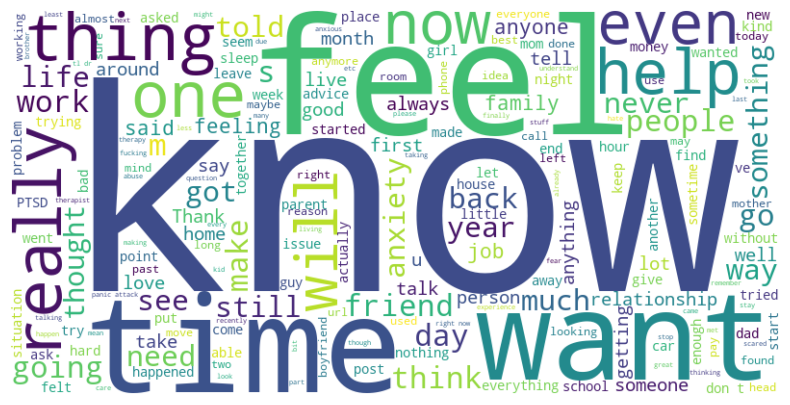

In [67]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

 ## Extract text data from the dataset
text_posts = ' '.join(df['text'])
 
#  Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_posts)

#  Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
#Applying sentiment
df["sentiment"] = posts["text"].apply(mood)
posts.head()

,text,sentiment,meaning
0,said felt way suggeted go rest trigger ahead y...,-0.002742,Stressed
1,hey rassistance sure right place post goes im ...,0.292857,No stress
2,mom hit newspaper shocked would knows dont lik...,0.011894,Stressed
3,met new boyfriend amazing kind sweet good stud...,0.141671,Stressed
4,october domestic violence awareness month dome...,-0.204167,Stressed


We can infer from this,that adding meaning to our texts,enhances its sentiment polarity,thus better enabling detection of stress !

<Axes: xlabel='meaning', ylabel='count'>

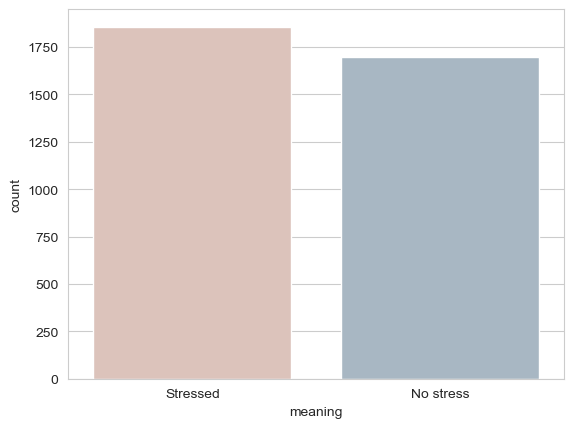

In [69]:
#sns.displot(x=posts.meaning, kind='kde')
sns.countplot(x='meaning',data = posts, palette= ["#e1c0b6", "#a3b8c8"])

# Let's begin Modelling !

In [70]:
#Assign variables; x = features & y = target
X = posts.text
y = posts.meaning

In [71]:
## Feature Extraction by applying Vectorization

In [72]:
vect=CountVectorizer(stop_words="english")
X=vect.fit_transform(X)

Vectorization is used to transform textual data to a numerical format that machines understand and process the input. After text vectorization is performed, the resulting numerical data can be used for advanced linguistic applications.

Splitting the dataset

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=43)

# using NLP classifiers

Model 1 - Naive Bayes¶
Naive Bayes is a probabilistic algorithm that makes classifications using Bayes' theorem(s). It assumes that the presence of a feature in a class is unrelated to the presence of any other feature. This assumption is called class conditional independence.

The algorithm calculates the probability that a given input data point belongs to each class, and then assigns the input data point to the class with the highest probability.

It is called "naive" because of the independence assumption. It is often used in text classification and spam filtering.

In [74]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
m1=mb.fit(X_train,y_train).predict(X_test)

print("Model Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test)*100, 2)))

Model Accuracy is 74.13%


<Axes: >

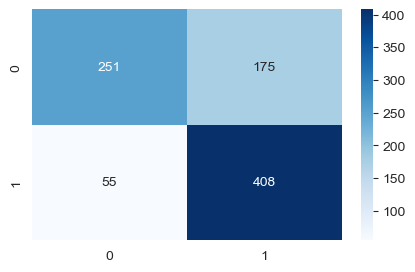

In [75]:
# Confusion Matrix for Naive Bayes
cm = confusion_matrix(y_test, m1)

df_cm = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (5, 3))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [76]:
#Hyperparameter tuning for naive_bayes

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]  # Example values for alpha
}

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_classifier = grid_search.best_estimator_

# Evaluate the best model on the test data
test_accuracy = best_classifier.score(X_test, y_test)
print("Test accuracy:",test_accuracy)

Best hyperparameters: {'alpha': 0.5}
Test accuracy: 0.7322834645669292


Model - Bernoulli Naive Bayes
Bernoulli Naive Bayes is basically used for spam detection, text classification, Sentiment Analysis, used to determine whether a certain word is present in a document or not

In [78]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [79]:
nb.score(X_test, y_test)


0.735658042744657

In [80]:
#Hyperparameter tuning for BernoulliNB

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Example values for alpha
    'binarize': [None, 0.0, 0.1, 0.5]  # Example values for binarize
}

# Create a Bernoulli Naive Bayes classifier
classifier = BernoulliNB()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_classifier = grid_search.best_estimator_

# Evaluate the best model on the test data
test_accuracy = best_classifier.score(X_test, y_test)
print("Test accuracy:",test_accuracy)

Best hyperparameters: {'alpha': 1.0, 'binarize': None}
Test accuracy: 0.7412823397075365


Model 2 - Logistic Regression¶ Logistic Regression is a supervised machine learning algorithm that is used for binary and multiclass classification. It is a statistical method that we use to fit a regression model when the response variable is binary.

Instead of predicting a continuous output, the model predicts a probability of a specific class or event existing such as the probability that an email is spam or not.

Logistic Regression estimates the probability that an input belongs to a certain class by using a logistic function, which is a sigmoid function that maps any input to a value between 0 and 1.

In [82]:
## logistic regression model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [83]:
from sklearn.linear_model import LogisticRegression
m2=LogisticRegression().fit(X_train, y_train)
score = m2.score(X_test,y_test)
print(f'Mean square error: {score:.2f}')
#accuracy_score(m2,y_test)
print("Model Accuracy is {p}%".format(p =round (score*100, 2)))

Mean square error: 0.73
Model Accuracy is 72.67%


In [84]:
predictions = logmodel.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

   No stress       0.72      0.69      0.71       426
    Stressed       0.73      0.76      0.74       463

    accuracy                           0.73       889
   macro avg       0.73      0.73      0.73       889
weighted avg       0.73      0.73      0.73       889



In [87]:
#hyperparameter tuning for Logistics Regression

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume X_train, y_train are your training data and labels
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the logistic regression model
logreg = LogisticRegression()

# Define hyperparameters and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Evaluate the model with the best hyperparameters on the validation set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test,y_test)


print("accuracy on Test Set:",accuracy)

accuracy on Test Set: 0.7210348706411699


Model 3 - Decision Tree¶
Decision Trees is a supervised machine learning algorithm used for classification and regression. It works by recursively partitioning the data into subsets based on feature values.

Each partition or subset of the data is called a leaf node, and the decision of which feature to split on is represented by the branches. The goal is to create a tree structure where each internal node represents a feature, and each leaf node represents a class label.

The final result is a tree-like model where the path from the root to a leaf represents a series of decisions that lead to a prediction.

In [90]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(X_train,y_train)
m3=d.predict(X_test)
print("Model Accuracy is {p}%".format(p =round (accuracy_score(y_test,m3)*100, 2)))

Model Accuracy is 64.68%


<Axes: >

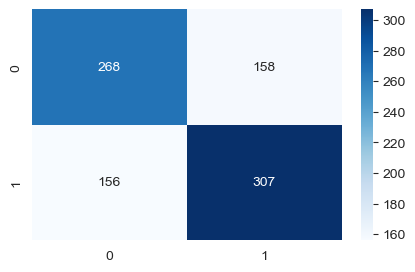

In [91]:
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, m3)

df_cm = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (5, 3))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [92]:
#hyperparameter tuning for Decision Tree Classifier

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_classifier = grid_search.best_estimator_

# Evaluate the best model on the test data
test_accuracy = best_classifier.score(X_test, y_test)
print("Test accuracy:",test_accuracy)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test accuracy: 0.6479190101237345


SVM classifier Model - SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin.

In [94]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

SVC(kernel='linear')

In [95]:
accuracy = clf.score(X_test,y_test)
print("Test accuracy :",accuracy)

Test accuracy : 0.7007874015748031


<Axes: >

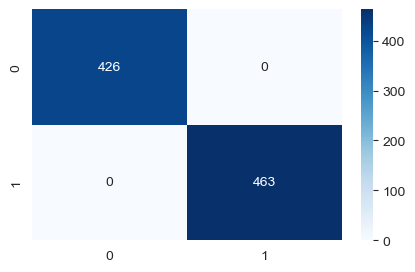

In [96]:
 # Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (5, 3))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [97]:
## Hyperparameter tunning for svm

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Create an SVM classifier
classifier = SVC()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_classifier = grid_search.best_estimator_

# Evaluate the best model on the test data
test_accuracy = best_classifier.score(X_test, y_test)
print("Test accuracy:",test_accuracy)

Best hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Test accuracy: 0.7210348706411699


# Let's give it a test !

In [98]:
#Using Naive Bayes
prompt = "i was home less "
p = vect.transform([prompt]).toarray()
op = mb.predict(p)
print(op)

['Stressed']


In [99]:
##using BernoulliNB()
text = "Its a worst feeling"
test = vect.transform([text]).toarray()  
nb.predict(test)

array(['Stressed'], dtype='<U9')

In [100]:
#Using Logistic Regression
prompt = "The weather is pleasent"
p = vect.transform([prompt]).toarray()  
op = m2.predict(p)
print(op)

['No stress']


In [101]:
#Using Decision Trees
prompt = "Sometime I feel like I need some time "
p = vect.transform([prompt]).toarray()
op = d.predict(p)
print(op)

['Stressed']


In [102]:
#Using SVM
prompt = "i was feeling"
p = vect.transform([prompt]).toarray()
op = clf.predict(p)
print(op)


['No stress']


# Thank you